In [1]:
###Web scrapping###

import requests
import pandas as pd

In [2]:
url = "https://www.worldometers.info/coronavirus/#countries"

In [3]:
html = requests.get(url).content

In [4]:
df_list = pd.read_html(html)

In [5]:
df = df_list[-1]

In [6]:
df.to_csv('covid.csv', index=False)

# EDA

In [7]:
df_covid = pd.read_csv('covid.csv')

In [8]:
import matplotlib.pyplot as plt

In [9]:
df_covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Reported1st case
0,China,81439,+45,3300.0,+5,75448.0,2691,742.0,57.0,2.0,Jan 10
1,USA,143491,"+19,913",2582.0,+362,4559.0,136350,2970.0,434.0,8.0,Jan 20
2,Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
3,Spain,80110,"+6,875",6803.0,+821,14709.0,58598,4165.0,1713.0,146.0,Jan 30
4,Germany,62435,"+4,740",541.0,+108,9211.0,52683,1979.0,745.0,6.0,Jan 26


In [10]:
df_covid.shape

(202, 11)

In [11]:
df_covid.rename(columns = {'Country,Other':'Country',
                          'Serious,Critical':'Critical'
                          },inplace = True)

In [12]:
df_covid.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,Reported1st case
0,China,81439,+45,3300.0,+5,75448.0,2691,742.0,57.0,2.0,Jan 10
1,USA,143491,"+19,913",2582.0,+362,4559.0,136350,2970.0,434.0,8.0,Jan 20
2,Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
3,Spain,80110,"+6,875",6803.0,+821,14709.0,58598,4165.0,1713.0,146.0,Jan 30
4,Germany,62435,"+4,740",541.0,+108,9211.0,52683,1979.0,745.0,6.0,Jan 26


Total number of countries 

In [13]:
df_covid.Country.count()

202

Total cases all over the world

In [14]:
df_covid['TotalCases'][-1:]

201    723390
Name: TotalCases, dtype: int64

Total recover cases all over the world

In [15]:
df_covid.TotalRecovered[-1:]

201    151312.0
Name: TotalRecovered, dtype: float64

Total deaths all over world

In [16]:
df_covid.TotalDeaths[-1:]

201    34064.0
Name: TotalDeaths, dtype: float64

# COUNTRY VS TOTALDEATH

In [17]:
death = df_covid.sort_values(by = 'TotalDeaths', ascending = False).head(30).iloc[1:]

In [18]:
death.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,Reported1st case
2,Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
3,Spain,80110,"+6,875",6803.0,+821,14709.0,58598,4165.0,1713.0,146.0,Jan 30
0,China,81439,+45,3300.0,+5,75448.0,2691,742.0,57.0,2.0,Jan 10
6,Iran,38309,"+2,901",2640.0,+123,12391.0,23278,3206.0,456.0,31.0,Feb 18
5,France,40174,"+2,599",2606.0,+292,7202.0,30366,4632.0,615.0,40.0,Jan 23


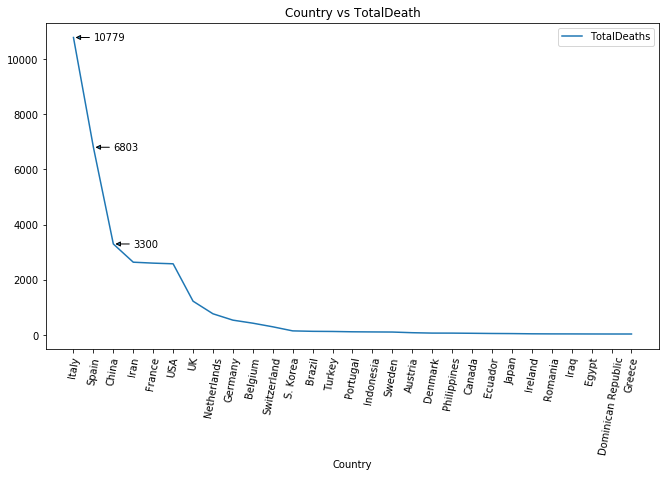

In [19]:
plt.figure(figsize=(11,6))
plt.plot(death['Country'],death['TotalDeaths'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalDeath')
plt.annotate(10779, 
             xy=('Italy', 10779),
             xytext = ('Spain',10779),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(6803, 
             xy=('Spain', 6803),
             xytext = ('China', 6803),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(3300, 
             xy=('China', 3300),
             xytext = ('Iran', 3300),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALCASES

In [20]:
case = df_covid.sort_values(by = 'TotalCases', ascending = False).head(30).iloc[1:]

In [21]:
case.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,Reported1st case
1,USA,143491,"+19,913",2582.0,+362,4559.0,136350,2970.0,434.0,8.0,Jan 20
2,Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
0,China,81439,+45,3300.0,+5,75448.0,2691,742.0,57.0,2.0,Jan 10
3,Spain,80110,"+6,875",6803.0,+821,14709.0,58598,4165.0,1713.0,146.0,Jan 30
4,Germany,62435,"+4,740",541.0,+108,9211.0,52683,1979.0,745.0,6.0,Jan 26


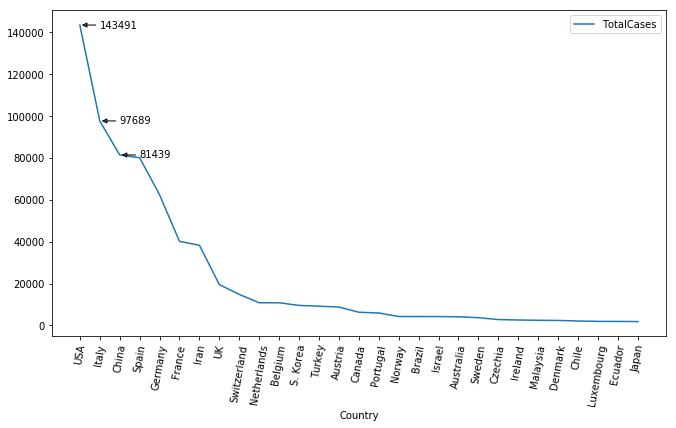

In [22]:
plt.figure(figsize=(11,6))
plt.plot(case['Country'],case['TotalCases'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.annotate(97689, 
             xy=('Italy', 97689),
             xytext = ('China',97689),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(143491, 
             xy=('USA', 143491),
             xytext = ('Italy', 143491),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(81439, 
             xy=('China', 81439),
             xytext = ('Spain', 81439),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALRECOVERED

In [23]:
recover = df_covid.sort_values(by = 'TotalRecovered', ascending = False).head(30).iloc[1:]

In [24]:
recover.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,Reported1st case
0,China,81439,+45,3300.0,+5,75448.0,2691,742.0,57.0,2.0,Jan 10
3,Spain,80110,"+6,875",6803.0,+821,14709.0,58598,4165.0,1713.0,146.0,Jan 30
2,Italy,97689,"+5,217",10779.0,+756,13030.0,73880,3906.0,1616.0,178.0,Jan 29
6,Iran,38309,"+2,901",2640.0,+123,12391.0,23278,3206.0,456.0,31.0,Feb 18
4,Germany,62435,"+4,740",541.0,+108,9211.0,52683,1979.0,745.0,6.0,Jan 26


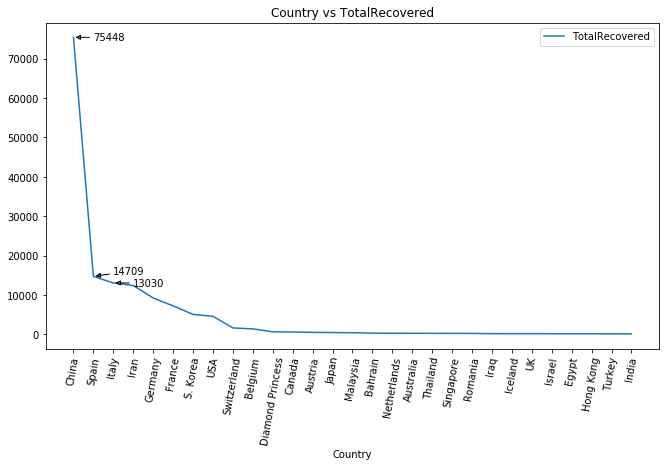

In [26]:
plt.figure(figsize=(11,6))
plt.plot(recover['Country'],recover['TotalRecovered'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalRecovered')
plt.annotate(14709, 
             xy=('Spain', 14709),
             xytext = ('Italy',16009),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(13030, 
             xy=('Italy', 13030),
             xytext = ('Iran', 13030),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(75448, 
             xy=('China', 75448),
             xytext = ('Spain', 75448),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()